## Plots
### Comparison to other methods (set $n$, $m$, $\sigma_t$, $\sigma_p$, $\sigma_e$)
- e-greedy/ucb/elo/gavel, x: comparison num, y: 1st place accuracy
- e-greedy/ucb/elo/gavel, x: comparison num, y: 2st place accuracy
- e-greedy/ucb/elo/gavel, x: comparison num, y: 3st place accuracy
- e-greedy/ucb/elo/gavel, x: comparison num, y: 1st place in top 5
- e-greedy/ucb/elo/gavel, x: comparison num, y: 2st place in top 5
- e-greedy/ucb/elo/gavel, x: comparison num, y: 3st place in top 5
- e-greedy/ucb/elo/gavel, x: comparison num, y: rbo(p=0.5)

### Sensitivity to env hyperparemeters}
- e-greedy/ucb, x: $\sigma_t$, y: rbo(p=0.5)
- e-greedy/ucb, x: $\sigma_p$, y: rbo(p=0.5)
- e-greedy/ucb, x: $\sigma_e$, y: rbo(p=0.5)
- e-greedy/ucb, x: $m$, y: rbo(p=0.5)
- e-greedy/ucb, x: $n$, y: rbo(p=0.5)

### Sensitivity to algorithm hyperparemeters (set $n$, $m$, $\sigma_t$, $\sigma_p$, $\sigma_e$)
- e-greedy, x: $\epsilon$, y: rbo(p=0.5)
- ucb, x: $c$, y: rbo(p=0.5)

---

In [12]:
from ucb import UCB
from JudgingSimulator import JudgingSimulator
from epsilongreedy import EpsilonGreedy
from ELO import ELO
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from AbstractAlgo import ordinal_names

### Comparison to other methods (set $n$, $m$, $\sigma_t$, $\sigma_p$, $\sigma_e$)

In [2]:
n_teams = 50; n_judges = 1; team_var = None; opinion_var = 0.001; eval_var = 0.001

- e-greedy/ucb/elo/gavel, x: comparison num, y: 1st place accuracy
- e-greedy/ucb/elo/gavel, x: comparison num, y: 2st place accuracy
- e-greedy/ucb/elo/gavel, x: comparison num, y: 3st place accuracy
- e-greedy/ucb/elo/gavel, x: comparison num, y: 1st place in top 5
- e-greedy/ucb/elo/gavel, x: comparison num, y: 2st place in top 5
- e-greedy/ucb/elo/gavel, x: comparison num, y: 3st place in top 5
- e-greedy/ucb/elo/gavel, x: comparison num, y: rbo(p=0.5)

In [3]:
true_q = np.linspace(0.05, 0.95, n_teams)
sim = JudgingSimulator(true_q, n_judges, opinion_var, eval_var)
n_iters = np.array([1, 5, 10, 50, 100])
n_episodes = 100

In [7]:
results = defaultdict(list)
for n_iter in n_iters:
    experiment = EpsilonGreedy(sim, epsilon=0.1).run_experiment(n_episodes, top_n=-1, n_comparisons=n_iter)
    results['epg'].append(experiment)
    experiment = UCB(sim, c=1).run_experiment(n_episodes, top_n=-1, n_comparisons=n_iter)
    results['ucb'].append(experiment)
    experiment = ELO(sim).run_experiment(n_episodes=100, top_n=-1, n_comparisons=n_iter)
    results['elo'].append(experiment)

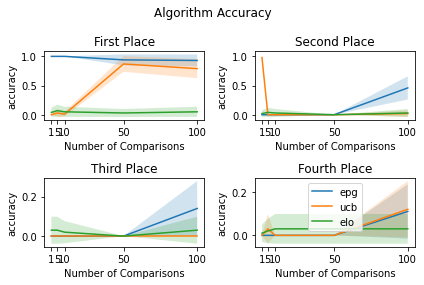

In [32]:
# for p in np.linspace(.1, .9, 9):
n_places = 4
grid=(2,2)
for i in np.arange(n_places):
    ax = plt.subplot(2,2, i+1)
    for algo, results_ in results.items():
        mean = np.array([result.accuracies[:,i].mean() for result in results_])
        plt.plot(n_iters, mean, label=algo) #f'p={p:.1f}')
        std = np.array([result.accuracies[:,i].std() for result in results_])
        plt.fill_between(n_iters, mean-std*0.4, mean+std*0.4, alpha=0.2)

    # plt.legend(title='Algorithm')
    plt.xticks(n_iters)
    plt.title(f'{ordinal_names[i].title()} Place')
    plt.ylabel('accuracy')
    # plt.ylim(0, 1)
    plt.xlabel('Number of Comparisons')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center')
plt.suptitle('Algorithm Accuracy')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'comparisons')

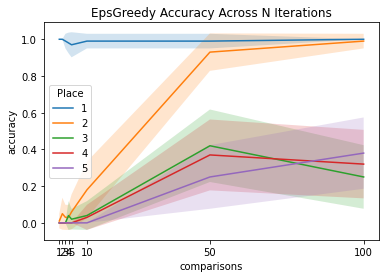

In [45]:
# for p in np.linspace(.1, .9, 9):
for i in np.arange(5):
    mean = np.array([result.accuracies[:,i].mean() for result in results])
    plt.plot(n_iters, mean, label=f'{i+1}') #f'p={p:.1f}')
    std = np.array([result.accuracies[:,i].std() for result in results])
    plt.fill_between(n_iters, mean-std*0.4, mean+std*0.4, alpha=0.2)

plt.legend(title='Place')
plt.xticks(n_iters)
plt.title('EpsGreedy Accuracy Across N Iterations')
plt.ylabel('accuracy')
# plt.ylim(0, 1)
plt.xlabel('comparisons')

In [28]:
K = 
results = []

for n_iter in n_iters:
    experiment = ELO(sim).run_experiment(n_episodes=100, top_n=-1, n_comparisons=n_iter)
    results.append(experiment)

SyntaxError: invalid syntax (<ipython-input-28-00d793066b95>, line 1)